In [6]:
from matplotlib import pyplot as plt
import numpy as np


In [18]:
def average_rows(x,nblock=100):
    nr=x.shape[0]//nblock
    nc=x.shape[1]
    y=np.zeros((nr,nc),dtype=x.dtype)
    for i in range(nr):
        y[i,:]=np.mean(x[i*nblock:(i+1)*nblock],axis=0)
    return y

In [62]:
with np.load("../spectra_1830_1840_4096_drift_delay.npz") as f:
    spec1=f['spectra1']
    spec2=f['spectra2']
    delays=f['delays']

In [28]:
spec1.shape

(500000, 10)

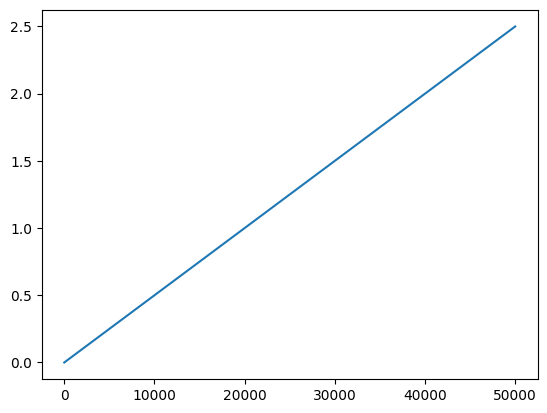

In [63]:
plt.plot(delays)

In [98]:
y1=average_rows(np.abs(spec1)**2,nblock=1000)
y2=average_rows(np.abs(spec2)**2,nblock=1000)
xc=spec1*np.conj(spec2)
avglen=10000
xc_avg=average_rows(xc,nblock=avglen)

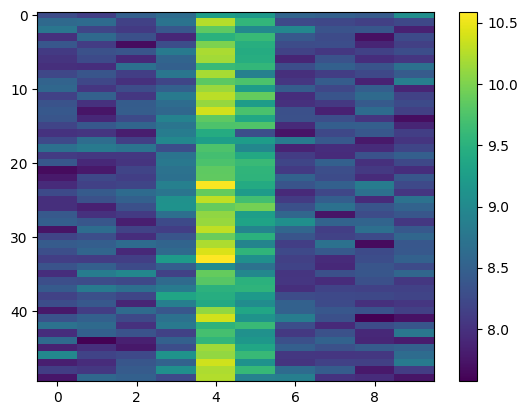

In [65]:
plt.imshow(y1,aspect='auto',interpolation='None')
plt.colorbar()

In [87]:
noise = np.std(xc_avg[:,[0,1,2,6,7,8,9]])
signal = np.std(xc_avg[:,[4]])
print(signal/noise/np.sqrt(avglen))

0.20584197284649713


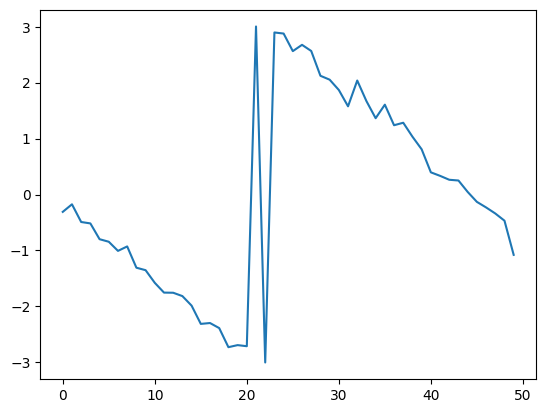

In [ ]:

plt.plot(np.angle(xc_avg[:,4]))

In [88]:
xc_avg_phased = xc_avg[:,4]*np.conj(xc_avg[:,4])/np.abs(xc_avg[:,4]) * np.exp(1j*np.angle(xc_avg[0,4])) #remove their own phase and multiply by chunk 0's phase

In [94]:
np.angle(xc_avg_phased)

array([-0.30979976, -0.30979976, -0.30979976, -0.30979976, -0.30979976,
       -0.30979976, -0.30979976, -0.30979976, -0.30979976, -0.30979976,
       -0.30979976, -0.30979976, -0.30979976, -0.30979976, -0.30979976,
       -0.30979976, -0.30979976, -0.30979976, -0.30979976, -0.30979976,
       -0.30979976, -0.30979976, -0.30979976, -0.30979976, -0.30979976,
       -0.30979976, -0.30979976, -0.30979976, -0.30979976, -0.30979976,
       -0.30979976, -0.30979976, -0.30979976, -0.30979976, -0.30979976,
       -0.30979976, -0.30979976, -0.30979976, -0.30979976, -0.30979976,
       -0.30979976, -0.30979976, -0.30979976, -0.30979976, -0.30979976,
       -0.30979976, -0.30979976, -0.30979976, -0.30979976, -0.30979976])

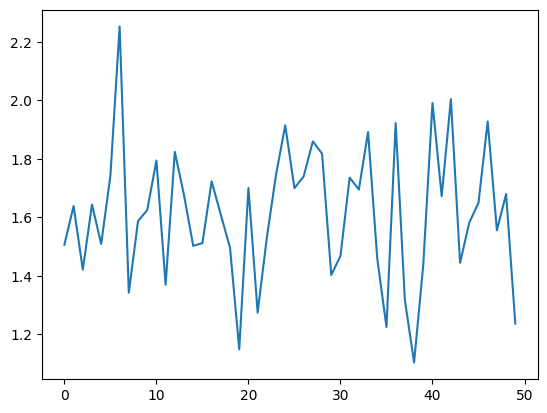

In [90]:
plt.plot(np.real(xc_avg_phased))

In [92]:
np.angle(np.mean(xc_avg_phased))

np.float64(-0.30979976415658333)

In [ ]:
np.angle(xc_avg[0,4])/(2*np.pi*1834/4096) #value slightly less than actual expected delay because of averaging of drift.``

np.float64(-0.27901543566552117)

In [57]:
np.angle(np.mean(xc[:50000,:],axis=0))

array([ 1.87260614,  2.97183464, -2.38418327,  2.91621708,  2.91031553,
        2.93716408,  0.49052506,  1.50374349,  2.25373399,  1.75984254])

In [48]:
((2*np.pi*1834*2.5/4096)%(2*np.pi))%(np.pi)-np.pi

-2.3914760483137147

In [45]:
np.angle(np.exp(2j*np.pi*1834*5.5/4096))

np.float64(2.9068935930432906)

In [ ]:
print(np.angle(np.exp(2j*np.pi*1833*2.5/4096)))
print(np.angle(np.exp(2j*np.pi*1834*2.5/4096)))
print(np.angle(np.exp(2j*np.pi*1835*2.5/4096)))

0.7462816533063641
0.7501166052760782
0.7539515572457922


In [56]:
print(np.angle(np.exp(2j*np.pi*1834*5.5/4096)))


2.9068935930432906
